<a href="https://colab.research.google.com/github/HemanthBodduboinagithub/ML--usecases-/blob/main/Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data = files.upload()

Saving train - train.csv to train - train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train - train.csv')

In [ ]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [ ]:
df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [ ]:
X = df.drop('target',axis='columns')
y =df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
model.score(X_test,y_test)

0.9849000136035914

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
# CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[50,  0,  0, ...,  0,  0,  0],
       [ 0, 40,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 37,  0,  0],
       [ 0,  0,  0, ...,  0, 41,  0],
       [ 0,  0,  0, ...,  0,  0, 41]])

Text(45.722222222222214, 0.5, 'Truth')

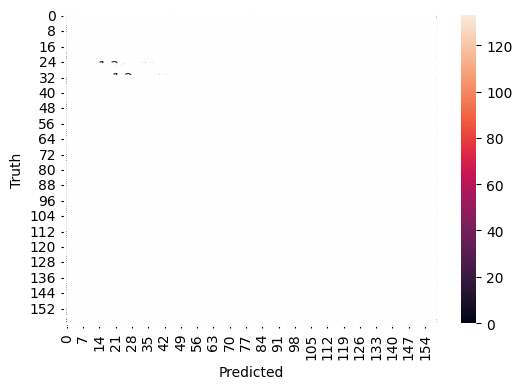

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')